# RandomizedSearch

총 조합수 1400개 중 `n_iter=60` 에 따라 60개를 random하게 조합하여 테스트한 결과 값이기 때문에 <u>매번 학습하고 확인할 때마다 최적의 파라미터와 정확도 값이 다릅니다.</u><br>따라서, 이를 실행했을 때 <u>나온 파라미터 값들을 그 주위의 값들과 함께 다시 넣어서</u><br> `GridSearch`를 통해 **세부화해서 조금 더 최적의 하이퍼 파라미터 값들을 찾을 수 있습니다.**

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [9]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

tree = DecisionTreeClassifier(random_state=0)
params = {
    "max_depth":range(1, 6), # 5
    "max_leaf_nodes":range(3, 31), # 28 
    "max_features":np.arange(0.1, 1.1, 0.1) # 10 # 학습시 사용할 컬럼의 비율
}
print("총 조합수:", (5 * 28 *10))

rs = RandomizedSearchCV(tree, # 모델
                        params, # 하이퍼파라미터 후보
                        n_iter=60, # 테스트해볼 조합의 개수.
                        scoring="accuracy", 
                        cv=4, 
                        n_jobs=-1
                       )
rs.fit(X_train, y_train)

총 조합수: 1400


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 6),
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_leaf_nodes': range(3, 31)},
                   scoring='accuracy')

In [7]:
print("best score:", rs.best_score_)
print("best parameter:", rs.best_params_)

best score: 0.9507362017280903
best parameter: {'max_leaf_nodes': 25, 'max_features': 0.4, 'max_depth': 2}


In [10]:
# RandomizedSearch에 찾은 하이퍼파라미터들을 기준으로 그 근처의 값들을 좀더 세분화해서 찾는다.
params2 = {
    "max_leaf_nodes":[5,6,7,8,9,10,11], 
    "max_depth":[1, 2, 3, 4, 5],
    "max_features":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=0), 
                   params2, 
                   scoring='accuracy', 
                   cv=4, 
                   n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy')

In [11]:
### 결과 확인
print(gs.best_score_)
print(gs.best_params_)

0.9577455475224828
{'max_depth': 4, 'max_features': 0.4, 'max_leaf_nodes': 6}


In [14]:
bm = gs.best_estimator_
pred_test = bm.predict(X_test)
accuracy_score(y_test, pred_test)

0.9300699300699301

In [15]:
gs.predict(X_test)

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [16]:
bm.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02151488, 0.        , 0.        ,
       0.        , 0.03561708, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.7917904 , 0.        , 0.        , 0.        , 0.02031961,
       0.        , 0.        , 0.13075803, 0.        , 0.        ])

# 파이프라인 (Pipeline)

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [18]:
# 파이프라인 정의
## 실행 순서에 맞춰서 리스트로 작성
### 각 프로세스는 ("이름", 객체)의 튜플로 구현
steps = [
    ("scaler", StandardScaler()), # 첫번째 프로세스
    ("svm", SVC(random_state=0))  # 두번째 프로세스
]
# 생성
pl = Pipeline(steps, verbose=True) 
# verbose: 실행 로그(기록)을 출력 => 어떤 단계를 실행하고 있는지, 실행에 걸린 시간 등을 출력
print(pl.steps)
print(type(pl.steps))

[('scaler', StandardScaler()), ('svm', SVC(random_state=0))]
<class 'list'>


In [19]:
pl.steps[0]

('scaler', StandardScaler())

In [20]:
# X_train_scaled = scaler.fit_transform(X_train) --> svm.fit(X_train_scaled, y_train)
pl.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svm, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=0))],
         verbose=True)

In [21]:
# X_test_scaled = scaler.transform(X_test) --> pred = svm.predict(X_test_scaled)

pred_train = pl.predict(X_train)
pred_test = pl.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9929577464788732, 0.958041958041958)

In [24]:
# 새로운 데이터로 y를 추정 (서비스)
new_x = X_test[:5]

pred_new = pl.predict(new_x)
pred_new

array([1, 0, 0, 1, 0])

## make_pipeline() 함수를 이용 파이프라인 생성

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA 

pl2 = make_pipeline(StandardScaler(), 
                    PCA(n_components=5), 
                    DecisionTreeClassifier(),
                    SVC(random_state=0, C=1, gamma=0.1))

In [33]:
pl2.steps

[('standardscaler', StandardScaler()),
 ('pca', PCA(n_components=5)),
 ('decisiontreeclassifier', DecisionTreeClassifier()),
 ('svc', SVC(C=1, gamma=0.1, random_state=0))]

In [34]:
pl2.steps[2], pl2.steps[0]

(('decisiontreeclassifier', DecisionTreeClassifier()),
 ('standardscaler', StandardScaler()))

# TODO Adult dataset

- 전처리
    - 범주형
        - 결측치는 최빈값으로 대체한다.
        - 원핫인코딩 처리한다.
    - 연속형
        - 결측치는 중앙값으로 대체한다.
        - StandardScaling을 한다.
- Model: `sklearn.linear_model.LogisticRegression(max_iter=2000)` 를 사용
- Pipeline을 이용해 전처리와 모델을 묶어준다.

In [37]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
category_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country']
continuous_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']
target = 'income'

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
import pandas as pd
df = pd.read_csv('../data/adult.data', 
                  header=None,
                  names=cols,
                  skipinitialspace=True,
                  na_values="?")

In [40]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [43]:
# X, y를 분리
X = df.drop(columns="income")
y = LabelEncoder().fit_transform(df.income)

In [44]:
# train/test set 분리
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.25, 
                                                    stratify=y, 
                                                    random_state=0)

In [45]:
# 파이프라인 
### 전처리 파이프라인 - 컬럼(feature) 타입별로 나눠서 구성
### 범주형 - 결측치(최빈값) -> OneHotEncoding
### 연속형 - 결측치(중앙값) -> StandardScaling

cate_preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

num_preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("category", cate_preprocess, category_columns), 
    ("continuous", num_preprocess, continuous_columns)
])

process = Pipeline([
    ("preprocess", preprocessor), 
    ("model", LogisticRegression(max_iter=2000, random_state=0))
])

---

## 위의 과정을 make_pipeline() 으로 재구현.

In [49]:
# make_pipeline()
from sklearn.pipeline import make_pipeline

make_pl = make_pipeline(
    
    ## 데이터 전처리 파이프라인
    ColumnTransformer([
    ("category", make_pipeline(SimpleImputer(strategy="most_frequent"), 
                               OneHotEncoder(handle_unknown="ignore")), category_columns),
    ("continuous", make_pipeline(SimpleImputer(strategy="median"), 
                                 StandardScaler()), continuous_columns)]),
    ## 학습 모델 파이프라인
    LogisticRegression(max_iter=2000, random_state=0)
)

In [47]:
process.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country']),
                                                 ('continuous',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('model', LogisticRegression(max_iter=2000, random_state=0))])

In [50]:
make_pl.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country']),
                                                 ('continuous',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=2000, random_state=0))])

In [51]:
pred_train = process.predict(X_train)
pred_test = process.predict(X_test)

pred_train_pl = make_pl.predict(X_train)
pred_test_pl = make_pl.predict(X_test)

In [52]:
# process 로 만든 모델
accuracy_score(y_train , pred_train), accuracy_score(y_test, pred_test)

(0.8524979524979525, 0.8478073946689596)

In [53]:
# make_pl 로 만든 모델
accuracy_score(y_train , pred_train_pl), accuracy_score(y_test, pred_test_pl)

(0.8524979524979525, 0.8478073946689596)

### make_pipeline() 을 통해 process를 만든 `make_pl` 이 잘됐다.

In [54]:
params = {
    "preprocess__continuous__imputer__strategy":["mean","median"],
    "model__C":[0.01, 0.1, 1, 10]
}
gs = GridSearchCV(process, 
                  params, 
                  scoring="accuracy", 
                  cv=5, 
                  n_jobs=-1)

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('category',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country']),
                                                                        ('continuous',
                                                                         Pipeline(ste...'imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week'])])),
                                       ('model',
                                        LogisticRegression(max_iter=2000,
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'preprocess__continuous__imputer__strategy': ['mean',
                                                                       'median']},
             scoring='accuracy')

In [55]:
gs.best_score_, gs.best_params_

(0.8510237510237509,
 {'model__C': 1, 'preprocess__continuous__imputer__strategy': 'mean'})

In [56]:
best_model_pipeline = gs.best_estimator_
best_model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country']),
                                                 ('continuous',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('model',
                 LogisticRegression(C=1, max_iter=2000, random_state=0))])

# SVM

## Linear SVM 
- 하이퍼 파라미터 'C' too ☝ : overfitting / too 👇 : underfitting

#### 선형적이다, 선형 분리<br>
=> 직선 형태의 데이터 : 점으로 분리 가능 == 1차원 데이터를 0차원 으로 분리<br>
=> 면 형태의 데이터 : 직선으로 분리 가능 == 2차원 데이터를 1차원 으로 분리<br>
=> 구 형태의 데이터 : 면으로 분리 가능 == 3차원 데이터를 2차원 으로 분리<br>

쉽게 생각하면 된다. 케이크 자르듯이, 3차원의 것을 2차원의 면-칼로 자른다.

## Kernel SVM (비선형(Non Linear) SVM)
- 하이퍼 파라미터 'C', 'gamma' -> too ☝ : overfitting / too 👇 : underfitting


In [15]:
### gamma도 C와 동일
# 작은 값 =================== 적당한값 =================== 큰값
#underfitting              generalization          overfitting
#<---soft margin (약한규제)                -----> hard margin (강한규제)


### 그러나 gamma 와 C는 각자 독립시행이다. 서로에게 영향을 안줌!

👉👉 "gamma" 는 **비선형 모델**일 때만 생각해야한다. <u>선형 모델에서는 ❌❌❌</u>

##### ROC AUC score, AP score 
- 추론->predict_proba() ==> 양성의 확률
- SVM은 predict_proba() 메소드를 사용하기 위해서는 SVC 객체 생성시 파라미터 `probability=True` 로 설정해야 한다.

`probability=True` 로 설정할 경우, SVC 객체는 확률을 예측할 수 있는 모델을 생성합니다. 이 모델은 `predict_proba 메서드` 를 제공하여 각 클래스에 속할 확률을 반환할 수 있습니다. 확률은 학습된 모델의 결정 함수 값에 기반하여 계산됩니다. predict_proba 메서드를 호출하면 각 클래스에 속할 확률이 반환됩니다.

`probability=False` 로 설정할 경우, SVC 객체는 확률 예측을 지원하지 않는 모델을 생성합니다. <u>따라서 predict_proba 메서드를 호출하면 오류가 발생할 것입니다.</u> 이 옵션을 선택하면 모델이 예측할 때 클래스 레이블만 반환됩니다.

probability=True를 사용하는 경우 모델은 확률 예측을 위해 추가적인 계산을 수행하므로 약간의 성능 저하가 발생할 수 있습니다. 그러나 확률 정보가 필요한 경우에는 이 옵션을 활성화해야 합니다.

**따라서 probability=True로 설정하면 확률 예측을 할 수 있는 모델이 생성되고, probability=False로 설정하면 확률 예측을 지원하지 않는 모델이 생성됩니다.**

# K-최근접 이웃 (K-Nearest Neighbors, KNN)

## 요약
- K-NN은 이해하기 쉬운 모델이며 튜닝할 하이퍼파라미터의 수가 적어 빠르게 만들 수있다.
- K-NN은 서비스할 모델을 구현할때 보다는 **복잡한 알고리즘을 적용해 보기 전에 확인 용 또는 base line을 잡기 위한 모델로 사용한다.**
- <u>훈련세트가 너무 큰 경우(Feature나 관측치의 개수가 많은 경우) 거리를 계산하는 양이 늘어나 예측이 느려진다.</u>
    - 추론에 시간이 많이 걸린다.
- Feature간의 값의 단위가 다르면 작은 단위의 Feature에 영향을 많이 받게 되므로 **전처리로 Feature Scaling작업**이 필요하다.
- <u>Feature가 너무 많은 경우와 대부분의 값이 0으로 구성된(희소-sparse) 데이터셋에서 성능이 아주 나쁘다.</u>  

### 위스콘신 유방암 데이터를 이용한 암환자분류

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.metrics import accuracy_score

In [5]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
###### K(이웃수) 변화에 따른 accuracy 확인.

train_acc_list = []
test_acc_list = []

k_list = range(1, 11) # k-nn의 k 후보들

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    pred_train = knn.predict(X_train_scaled)
    pred_test = knn.predict(X_test_scaled)
    
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [9]:
result_df = pd.DataFrame({
    "train":train_acc_list, 
    "test":test_acc_list
}, index=k_list)

result_df

,train,test
1,1.000000,0.951049
2,0.983568,0.930070
3,0.985915,0.951049
4,0.981221,0.965035
5,0.978873,0.951049
6,0.976526,0.951049
7,0.976526,0.958042
8,0.978873,0.951049
9,0.974178,0.951049
10,0.976526,0.951049


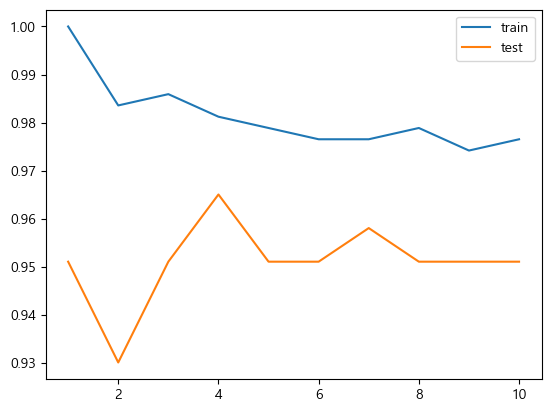

In [10]:
result_df.plot();

### Boston Housing Dataset 집값 예측
- 회귀문제

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

import pandas as pd

In [12]:
boston = pd.read_csv('../data/boston_hosing.csv')
X = boston.drop(columns='MEDV')
y = boston['MEDV'] ## MEDV 가 집값..

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
pipeline = Pipeline([("scaler", StandardScaler()), 
                     ("knn", KNeighborsRegressor())])

gs = GridSearchCV(pipeline, 
                  {"knn__n_neighbors":[2,3,4,5,6]},
                  scoring="neg_mean_squared_error", # 회귀 문제이기 때문에 accuracy를 평가지표로 사용하지않고, 
                                                  # 'mse' 를 사용
                  cv=4, n_jobs=-1
                 )

gs.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [2, 3, 4, 5, 6]},
             scoring='neg_mean_squared_error')

In [14]:
print(gs.best_score_,"  ",np.sqrt(-gs.best_score_))
print(gs.best_params_)

-19.1989140537514    4.381656542193991
{'knn__n_neighbors': 2}


In [15]:
%%writefile metrics.py

import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score,
                             average_precision_score,
                             PrecisionRecallDisplay,
                             precision_recall_curve,
                             roc_auc_score,
                             RocCurveDisplay,
                             roc_curve,
                             mean_squared_error,
                             mean_absolute_error,
                             r2_score,
)


# confusion matrix 시각화
def plot_confusion_matrix(y, pred, title=None):
    """
    confusion matrix 시각화
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 추정한 label
        title: str - 그래프의 제목
    """
    cm = confusion_matrix(y,pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Greys")
    
    if title :
        plt.title(title)
    plt.show()
    
    
    
def plot_roc_curve(y, pos_proba, estimator_name, title=None):
    """
    ROC Curve 시각화 함수
    [parameter]
        y : ndarray - 정답
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률
        estimator_name : str - 범례(legend)에 나올 모델의 이름.
        title : str - subplot의 제목
    """
    auc_score = roc_auc_score(y, pos_proba)
    fpr, tpr, _ = roc_curve(y, pos_proba)
    RocCurveDisplay(fpr = fpr , tpr=tpr, roc_auc = auc_score,  estimator_name= estimator_name).plot()
    if title :
        plt.title(title)
    plt.show()
    

    
def plot_precision_recall_curve(y, pos_proba, estimator_name, title=None):
    """
    Precision Recall Curve 시각화 함수
    [parameter]
        y : ndarray - 정답
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률
        estimator_name : str - 범례(legend)에 나올 모델의 이름.
        title : str - subplot의 제목
    """
    ap_score = average_precision_score(y,pos_proba)
    precision, recall, _ = precision_recall_curve(y, pos_proba)
    PrecisionRecallDisplay(precision, recall, average_precision=ap_score, 
                           estimator_name=estimator_name).plot()
    if title :
        plt.title(title)
    plt.show()
    
    
    

def print_metrics_classification(y, pred, pos_proba=None, title = None):
    """
    분류 결과에 대한 평가지표를 출력하는 함수.
    출력 내용 : accuracy, recall, precision, f1 score
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 추정한 label
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률, 
                                                default: None -ap score, auc score는 출력안한다.
        title: str - 그래프의 제목
    """
    if title:
        print(f"================={title}=================")
    print("정확도 Accuracy : ", accuracy_score(y, pred))
    print("재현율 Recall : ", recall_score(y, pred))
    print("정밀도 Precision : ", precision_score(y, pred))
    print("F-1 Score : ", f1_score(y, pred))
    
    if pos_proba is not None:
        print("Average Precision : ", average_precision_score(y,pos_proba))
        print("ROC-AUC : ", roc_auc_score(y,pos_proba))

        
def print_metrics_regression(y, pred, title=None):
    """
    회귀 평가지표를 출력하는 함수
    출력 내용 : mse, rmse, mae, r2
    [parameter]
    y: ndarray - 정답
    pred: ndarray - 모델 추정한 label
    """
    if title:
        print(f"================={title}=================")
    print("MSE : ", mean_squared_error(y,pred))
    print("RMSE : ", mean_squared_error(y,pred,squared=False))
    print("MAE : ", mean_absolute_error(y,pred))
    print("R2 : ",r2_score(y,pred))

Writing metrics.py


In [16]:
from metrics import print_metrics_regression

In [17]:
best_model = gs.best_estimator_

In [18]:
pred_train =best_model.predict(X_train)
pred_test = best_model.predict(X_test)
print_metrics_regression(y_train, pred_train, "Train set 평가")
print_metrics_regression(y_test, pred_test, "Test set 평가")

=================Train set 평가=================
MSE :  4.5287796833773095
RMSE :  2.128092968687531
MAE :  1.3296833773087073
R2 :  0.9469127493359332
=================Test set 평가=================
MSE :  26.36383858267716
RMSE :  5.134572872467306
MAE :  3.103543307086613
R2 :  0.6773053084994118


# 의사결정나무(Decision Tree )

## Wine Dataset을 이용한 color 분류 - 분류 문제

- https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- features
    - 와인 화학성분들
        - fixed acidity : 고정 산도
        - volatile acidity : 휘발성 산도
        - citric acid : 시트르산
        - residual sugar : 잔류 당분
        - chlorides : 염화물
        - free sulfur dioxide : 자유 이산화황
        - total sulfur dioxide : 총 이산화황
        - density : 밀도
        - pH : 수소 이온 농도
        - sulphates : 황산염
        - alcohol : 알콜
    - quality: 와인 등급 (A>B>C)
- target - color
    - 0: white, 1: red

In [23]:
import pandas as pd

wine = pd.read_csv('../data/wine.csv')
wine.shape

(6497, 13)

In [24]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [25]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,C,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,C,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,C,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,B,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,C,1


In [26]:
wine['color'].value_counts(normalize=True)

color
0    0.753886
1    0.246114
Name: proportion, dtype: float64

### 데이터셋 분리 및 전처리

##### 전처리
- 범주형 타입인 **quality**에 대해 Label Encoding 처리

>- DecisionTree 계열 모델
>    - 범주형: Label Encoding, 연속형: Feature Scaling을 하지 않는다.
>- 선형계열 모델(예측시 모든 Feature들을 한 연산에 넣어 예측하는 모델)
>    - 범주형: One Hot Encoding, 연속형: Feature Scaling을 한다.

In [27]:
# X, y 분리
X = wine.drop(columns='color')
y = wine['color']
X.shape, y.shape

((6497, 12), (6497,))

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['A', 'B', 'C'])
X['quality'] = le.transform(X['quality'])

In [30]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from metrics import print_metrics_classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [33]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [34]:
# 학습 한 tree정보
### depth, level을 조회
tree.get_depth()

13

In [35]:
### leaf node의 개수
tree.get_n_leaves() 

55

In [36]:
print_metrics_classification(y_train, 
                             tree.predict(X_train),
                             tree.predict_proba(X_train)[:, 1],
                             "Train set 평가결과")

=================Train set 평가결과=================
정확도 Accuracy :  0.9997947454844006
재현율 Recall :  1.0
정밀도 Precision :  0.9991666666666666
F-1 Score :  0.9995831596498541
Average Precision :  0.9999986099527384
ROC-AUC :  0.9999997729299327


In [37]:
print_metrics_classification(y_test, 
                             tree.predict(X_test),
                             tree.predict_proba(X_test)[:, 1],
                             "Test set 평가결과")

=================Test set 평가결과=================
정확도 Accuracy :  0.9858461538461538
재현율 Recall :  0.965
정밀도 Precision :  0.9772151898734177
F-1 Score :  0.9710691823899371
Average Precision :  0.9516280428432327
ROC-AUC :  0.9788265306122449


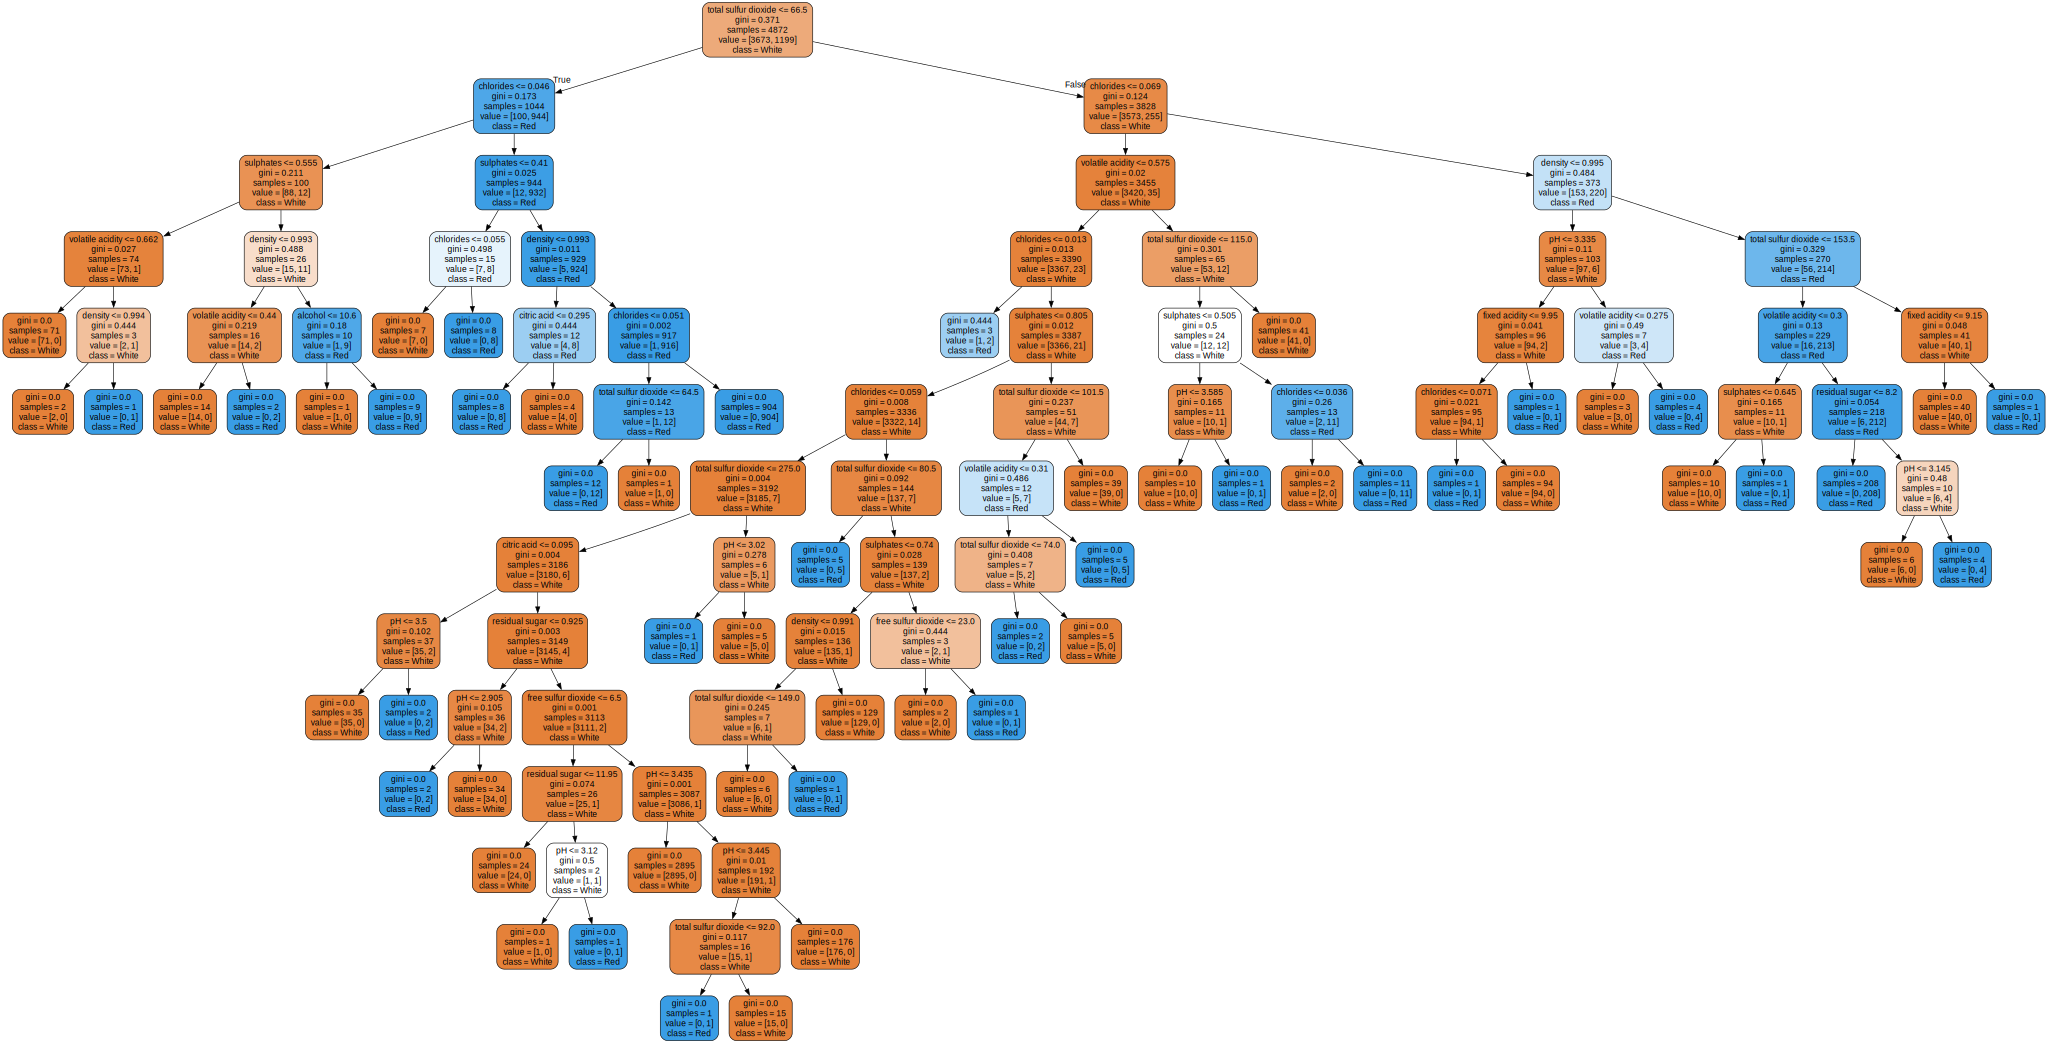

In [38]:
### graphviz를 이용해 tree 구조 시각화
graph = Source(export_graphviz(tree, 
                               feature_names=X_train.columns, 
                               class_names=["White", "Red"], 
                               rounded=True, 
                               filled=True
                              ))
graph

In [39]:
### graphviz 이미지 파일로 저장
export_graphviz(tree, 
                feature_names=X_train.columns,
                class_names=["White", "Red"], 
                rounded=True, 
                filled=True,
                out_file = "wine_tree_model.dot" # 이미지 파일로 저장
                              )


In [40]:
fi = pd.Series(tree.feature_importances_, index=X.columns)
fi.sort_values(ascending=False)

total sulfur dioxide    0.686318
chlorides               0.209503
density                 0.050939
volatile acidity        0.017080
sulphates               0.013149
pH                      0.011584
residual sugar          0.004433
citric acid             0.003065
fixed acidity           0.002153
alcohol                 0.000996
free sulfur dioxide     0.000780
quality                 0.000000
dtype: float64

In [ ]:
## GridSearch를 이용해 최적의 파라미터 조회

params = {
    "max_depth":range(1, 14), 
    "max_leaf_nodes":range(10, 34), 
    "min_samples_leaf":range(10, 1000, 50),  
    "max_features":range(1, 13)
}
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), 
                        params, 
                        scoring='accuracy', 
                        cv=5, 
                        n_jobs=-1, 
                        n_iter=60)

gs.fit(X_train, y_train)

In [42]:
params = {
    "max_depth":range(1, 14), 
    "max_leaf_nodes":range(10, 34), 
    "min_samples_leaf":range(10, 1000, 50),  
    "max_features":range(1, 13)
}
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), 
                        params, 
                        scoring='accuracy', 
                        cv=5, 
                        n_jobs=-1, 
                        n_iter=60)

gs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 14),
                                        'max_features': range(1, 13),
                                        'max_leaf_nodes': range(10, 34),
                                        'min_samples_leaf': range(10, 1000, 50)},
                   scoring='accuracy')

In [43]:
print("best score:", gs.best_score_)
print("best param:", gs.best_params_)

best score: 0.9807065761069869
best param: {'min_samples_leaf': 10, 'max_leaf_nodes': 12, 'max_features': 11, 'max_depth': 10}


In [44]:
best_model = gs.best_estimator_
fi = pd.Series(best_model.feature_importances_, index=X.columns)
fi.sort_values(ascending=False)

total sulfur dioxide    0.700570
chlorides               0.214770
volatile acidity        0.047592
fixed acidity           0.011832
density                 0.010538
sulphates               0.007551
pH                      0.007146
citric acid             0.000000
residual sugar          0.000000
free sulfur dioxide     0.000000
alcohol                 0.000000
quality                 0.000000
dtype: float64

## 의사결정나무 - 회귀문제 

In [47]:
%%writefile dataset.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


def get_wine_dataset(path='../data/wine.csv', test_size=0.25):
    df = pd.read_csv(path)
    X = df.drop(columns='color')
    y = df['color']
    le = LabelEncoder()
    le.fit(['A', 'B', 'C'])
    X['quality'] = le.transform(X["quality"])
    
    return train_test_split(X, y, test_size=test_size, stratify=y, random_state=0)
    
def get_boston_dataset(path="../data/boston_hosing.csv", test_size=0.25):
    df = pd.read_csv(path)
    X = df.drop(columns='MEDV')
    y = df['MEDV']
    dataset = train_test_split(X, y, test_size=test_size, random_state=0)
    return dataset


Overwriting dataset.py


In [1]:
from dataset import get_boston_dataset
import pandas as pd

X_train, X_test, y_train, y_test = get_boston_dataset() # test_size=0.3)
X_train.shape, X_test.shape

((379, 13), (127, 13))

In [2]:
# 모델링
from sklearn.tree import DecisionTreeRegressor
tree_rg = DecisionTreeRegressor(max_depth=2, random_state=0)
tree_rg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [3]:
tree_rg.get_depth()

2

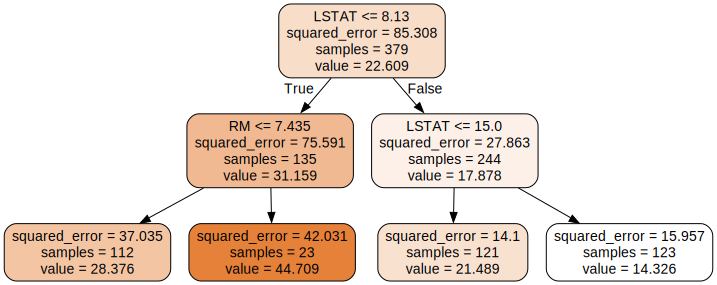

In [6]:
from graphviz import Source
from sklearn.tree import export_graphviz

graph2 = Source(export_graphviz(tree_rg, 
                                feature_names=X_train.columns, 
                                filled=True, 
                                rounded=True
                               ))

graph2

In [7]:
from metrics import print_metrics_regression
print_metrics_regression(y_train, tree_rg.predict(X_train), "train set")
print_metrics_regression(y_test, tree_rg.predict(X_test), "test set")

=================train set=================
MSE :  23.175292750947712
RMSE :  4.814072366608931
MAE :  3.614526607191391
R2 :  0.7283346372537175
=================test set=================
MSE :  33.32551599016633
RMSE :  5.772825650421666
MAE :  3.8768523941964874
R2 :  0.5920940318375818


In [8]:
fi2 = pd.Series(tree_rg.feature_importances_, index=X_train.columns)
fi2.sort_values(ascending=False)

LSTAT      0.783841
RM         0.216159
CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
dtype: float64

# Ensemble (앙상블)

## Random Forest (랜덤 포레스트)
- 투표, Bagging 방식의 앙상블
- DecisionTree 기반
- Random: 학습할 때 Train dataset을 random하게 sampling 한다. 
- Forest: 여러개의 (Decision) Tree 모델들을 앙상블한다.

부트스트랩 샘플링(중복을 허용하면서 랜덤하게 샘플링하는 방식, 복원 추출)으로 데이터셋을 준비.

In [9]:
from dataset import get_wine_dataset
X_train, X_test, y_train, y_test = get_wine_dataset()
print(X_train.shape, X_test.shape)
X_train.head(3)

(4872, 12) (1625, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4392,6.5,0.37,0.30,2.2,0.033,39.0,107.0,0.98894,3.22,0.53,13.5,0
3590,7.6,0.20,0.30,14.2,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,0
3898,7.0,0.32,0.31,6.4,0.031,38.0,115.0,0.99235,3.38,0.58,12.2,0


In [12]:
from sklearn.ensemble import RandomForestClassifier
from metrics import print_metrics_classification
import pandas as pd

rfc = RandomForestClassifier(n_estimators=500, # DecisionTree 모델 개수, 
                                            # default :100, 보통 최소 200개 이상 생성 추천
                             max_features=10, # sampling 할 때, 선택할 feature의 개수
                             max_depth=5, # 500개 D.T.에 공통으로 적용될 max_depth 값
                             random_state=0, 
                             n_jobs=-1
                            )
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, n_estimators=500,
                       n_jobs=-1, random_state=0)

In [13]:
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

proba_pos_train = rfc.predict_proba(X_train)[:, 1]
proba_pos_test = rfc.predict_proba(X_test)[:, 1]

In [14]:
print_metrics_classification(y_train, pred_train, proba_pos_train, "Train set")
print("\n")
print_metrics_classification(y_test, pred_test, proba_pos_test, "Test set")

=================Train set=================
정확도 Accuracy :  0.9952791461412152
재현율 Recall :  0.9808173477898249
정밀도 Precision :  1.0
F-1 Score :  0.9903157894736841
Average Precision :  0.9985336970853534
ROC-AUC :  0.9993187897982869


=================Test set=================
정확도 Accuracy :  0.9883076923076923
재현율 Recall :  0.97
정밀도 Precision :  0.9822784810126582
F-1 Score :  0.9761006289308176
Average Precision :  0.9939601093418081
ROC-AUC :  0.9967500000000001


In [16]:
fi_rf = pd.Series(rfc.feature_importances_, index=X_train.columns)
fi_rf = fi_rf.sort_values(ascending=False)
fi_rf

total sulfur dioxide    0.504782
chlorides               0.370821
volatile acidity        0.043422
density                 0.029867
sulphates               0.014663
fixed acidity           0.011035
residual sugar          0.010183
pH                      0.009304
citric acid             0.002435
alcohol                 0.002117
free sulfur dioxide     0.001196
quality                 0.000173
dtype: float64

# Ensemble - Boosting Model

- 약한 학습기들은 앞 학습기가 만든 오류를 줄이는 방향으로 학습한다

👉 "첫번째 학습 모델에서 틀린 부분을 그 다음 학습 모델이 추론해서 찾고, 거기서 또 틀린 부분을 그 다음 학습 모델이 찾고,..."
이렇게 순차적으로 선행 학습 모델이 틀린 부분들을 후행 학습 모델들이 찾으면서 찾지 못한 부분들을 계속해서 탐색해 나가는 과정.
서로 나눠서 학습 모델링을 하여 나중에 합쳐서 최종 강력한 하나의 것이 된다.👈

## GradientBoosting
- GradientBoostingClassifier 사용
- n_estimators를 가용시간, 메모리 한도에 맞춰 크게 설정하고 적절한 learning_rate을 찾는다.

In [11]:
from dataset import get_breast_cancer_dataset

(X_train, X_test, y_train, y_test), feature_names = get_breast_cancer_dataset()
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0)

# 모델 학습
gbc.fit(X_train, y_train)

pred_train = gbc.predict(X_train)
pred_test = gbc.predict(X_test)
proba_train = gbc.predict_proba(X_train)
proba_test = gbc.predict_proba(X_test)

In [13]:
from metrics import print_metrics_classification

print_metrics_classification(y_train, pred_train, proba_train[:, 1], "Trainset")
print_metrics_classification(y_test, pred_test, proba_test[:, 1], "Testset")

=================Trainset=================
정확도 Accuracy :  1.0
재현율 Recall :  1.0
정밀도 Precision :  1.0
F-1 Score :  1.0
Average Precision :  1.0
ROC-AUC :  1.0
=================Testset=================
정확도 Accuracy :  0.958041958041958
재현율 Recall :  0.9555555555555556
정밀도 Precision :  0.9772727272727273
F-1 Score :  0.9662921348314608
Average Precision :  0.9741338688529869
ROC-AUC :  0.9776729559748428


In [14]:
import pandas as pd
fi = pd.Series(gbc.feature_importances_, index=feature_names)
fi.sort_values(ascending=False)

worst perimeter            0.495177
worst concave points       0.162170
worst radius               0.130348
mean concave points        0.075636
worst texture              0.043937
worst area                 0.020648
area error                 0.013646
mean texture               0.012091
worst concavity            0.009068
concave points error       0.008011
texture error              0.006192
worst smoothness           0.004647
compactness error          0.004171
worst symmetry             0.003383
radius error               0.002706
mean concavity             0.002310
mean symmetry              0.001918
worst compactness          0.001776
smoothness error           0.001359
mean radius                0.000240
mean perimeter             0.000179
concavity error            0.000160
mean area                  0.000079
perimeter error            0.000061
symmetry error             0.000034
mean compactness           0.000026
worst fractal dimension    0.000014
mean fractal dimension     0

## TODO: GridSearchCV 이용해 최적의 하이퍼파라미터 찾기

#### RandomizedSearchCV 생성
- n_estimators : 100 ~ 1000
- learning_rate : 0.001 ~ 0.1
- max_depth : 1 ~ 3
- subsample : 0.1 ~ 1.0

In [6]:
from dataset import get_breast_cancer_dataset

(X_train, X_test, y_train, y_test), feature_names = get_breast_cancer_dataset()
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import time
import pandas as pd
import numpy as np

In [15]:
params ={
    "n_estimators" : range(100,1001,100), # 10
    "learning_rate" : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5], # 6
    "max_depth" : [1,2,3], # 3
    "subsample" : np.arange(0.1, 1.1, 0.1) # 3
} 

gs_classifier = GradientBoostingClassifier(random_state=0)

rs = RandomizedSearchCV(gs_classifier,
                        params,
                        scoring = "accuracy",
                        cv=4,
                        n_iter=60,
                        n_jobs=-1                       
)

s = time.time()
rs.fit(X_train, y_train)
e = time.time()

In [16]:
print(f"학습시간 : {e-s}초")
print(f"Best params : {rs.best_params_}")
print(f"Best score : {rs.best_score_}")

학습시간 : 41.36697959899902초
Best params : {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}
Best score : 0.9789058367131017


In [17]:
result_df = pd.DataFrame(rs.cv_results_).sort_values("rank_test_score")
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.580246,0.038511,0.003906,0.006765,0.5,500,3,0.1,"{'subsample': 0.5, 'n_estimators': 500, 'max_d...",0.962617,0.981308,0.981132,0.990566,0.978906,0.010149,1
55,1.078800,0.100401,0.000000,0.000000,0.4,800,1,0.5,"{'subsample': 0.4, 'n_estimators': 800, 'max_d...",0.953271,0.971963,0.971698,1.000000,0.974233,0.016695,2
46,0.843119,0.011065,0.001744,0.000432,0.2,600,2,0.05,"{'subsample': 0.2, 'n_estimators': 600, 'max_d...",0.943925,0.962617,0.990566,0.990566,0.971919,0.019784,3
42,0.630326,0.036249,0.000249,0.000432,0.2,600,1,0.1,"{'subsample': 0.2, 'n_estimators': 600, 'max_d...",0.934579,0.981308,0.990566,0.981132,0.971896,0.021880,4
41,2.345256,0.150823,0.003905,0.006764,0.6,900,3,0.1,"{'subsample': 0.6, 'n_estimators': 900, 'max_d...",0.943925,0.971963,0.981132,0.981132,0.969538,0.015254,5


In [18]:
best_model = rs.best_estimator_
pd.Series(best_model.feature_importances_, index = feature_names).sort_values(ascending=False)

worst concave points       0.244861
worst area                 0.146420
worst radius               0.143102
mean concave points        0.140078
worst perimeter            0.138918
worst texture              0.036992
worst concavity            0.032356
area error                 0.025216
mean texture               0.016944
radius error               0.011727
mean concavity             0.008094
worst smoothness           0.005879
mean perimeter             0.005799
concavity error            0.005791
worst symmetry             0.003958
perimeter error            0.003641
texture error              0.003621
smoothness error           0.003450
mean compactness           0.003179
mean symmetry              0.002810
concave points error       0.002479
compactness error          0.002434
mean area                  0.002335
worst compactness          0.002178
mean radius                0.001835
mean fractal dimension     0.001677
fractal dimension error    0.001322
mean smoothness            0

## XGBoost(Extra Gradient Boost)

In [21]:
# !pip install xgboost